

## Machine Learning Modeling

1. Loading "telecom_users_clean.csv" file (after preprocessing)

In [1]:
import pandas as pd # Allow us to work with CSV files
import numpy as np # Allow us to work with arrays
import matplotlib.pyplot as plt # Allow us to customize countplots and bar charts
import seaborn as sns # Import Seaborn visualization library
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
# Import train_test_split function, stratified K-Folds cross-validator and GridSearchCV
from imblearn.over_sampling import SMOTE # Allow us to resample unbalanced datasets
from sklearn.model_selection import cross_val_score # Import cross validation score
from sklearn.tree import DecisionTreeClassifier # Import decision tree classifier
from sklearn.ensemble import RandomForestClassifier # Import random forest classifier
from sklearn.linear_model import LogisticRegression # Import logistic regression
import warnings
warnings.filterwarnings('ignore') # Allow to disable Python warnings
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, f1_score, classification_report
# Import scikit-learn.metrics module for accuracy score, make_scorer, confusion matrix and classification_report
from sklearn import metrics # Import scikit-learn metrics module for Recall calculation
import graphviz # Import graphviz library to print the decision tree classifier
from sklearn import tree # Import tree library to build the content of the decision tree classifier

In [2]:
# Step 1: Loading "telecom_users_clean.csv" file

df_telecom = pd.read_csv(r'C:\Users\Julio\Documents\RESPALDO\Tareas\University of Essex\Project Dissertation\Technical Test Profusion\telecom_users_clean.csv') 
# Read a CSV file from a local path

print('\n"Telecom Users" dataset after preprocessing (All rows)(Truncated)')  
display(df_telecom) # Print the "telecom_users_clean.csv" dataset (truncated)               

# r'Paste here the whole path where the telecom_users_clean.csv file has been saved'
# r'' indicates a raw string


"Telecom Users" dataset after preprocessing (All rows)(Truncated)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,1,0,1,1,72,1,0,24.10,1734.65,0,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,0,44,1,1,88.15,3973.20,0,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,38,1,1,74.95,2869.85,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,4,1,1,55.90,238.50,0,...,0,1,0,0,0,0,1,1,0,0
4,1,0,0,0,2,1,0,53.45,119.50,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,1,0,1,0,1,1,1,95.00,95.00,1,...,0,0,0,1,0,0,1,1,0,0
5972,0,0,1,1,23,1,1,91.10,2198.30,0,...,1,0,0,1,0,0,1,0,0,1
5973,1,0,1,1,12,1,1,21.15,306.05,0,...,0,0,1,0,0,1,0,1,0,0
5974,1,1,0,0,12,1,1,99.45,1200.15,1,...,0,0,0,1,0,0,1,1,0,0


2. Analyzing imbalanced data

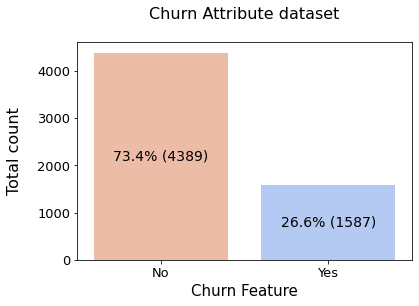

In [3]:
# Creating a function to add annotations to the countplot  

def print_rate(ax, total):
  for bar in ax.patches:             # For-loop iterates over all the existing bars in the graph
    text = '{:.1f}% ({})'.format(100 * bar.get_height() / total, bar.get_height()) 
    # Action 1: Calculate the percentage of each bar, Action 2: fetch the total counts of each bar (feature)
    x = bar.get_x() + bar.get_width() / 2        # Get the value of X-Axis
    y = bar.get_y() + bar.get_height() * 0.5     # Get the value of Y-Axis
    ax.annotate(text, (x, y), size = 14, ha="center", va="center") 
    # Place the annotation with the specified parameters

# Plotting the countplot for Churn attribute

chart = sns.color_palette("coolwarm", 2)   # Customize the color of the bars
chart.reverse()                            # Start the graph with color Red

fig = plt.figure()                         # create a figure object
ax = sns.countplot(x='Churn', palette=chart, data=df_telecom)  # Create the countplot with the specified parameters.

plt.xlabel('Churn Feature', size=15)              # This X-Axis property allows us to customize the labels of X-axis
plt.ylabel('Total count', size=16, labelpad=15)   # This Y-Axis property allows us to customize the labels of Y-axis

ax.set_xticklabels(["No","Yes"], size=13)  # This X-Axis property allows us to customize the values of the labels in X-axis   
plt.yticks(size=13)                        # This Y-Axis property allows us to customize the values of the labels in Y-axis
plt.title('Churn Attribute dataset\n', fontsize=16)    # Add a title to the countplot

print_rate(ax, df_telecom.shape[0]) # Call the function "print_rate"

plt.show()           # Display the current figure that we are working on

# sns.countplot          This function is used to show the total counts in each categorical bin by using bars.
# sns.color_palette      This parameter is used to customize the colors of the bars.
# set_xticklabels()      This X-Axis property is used to customize the X-Axis labels with a list of strings
# labelpad               This parameter is used to increase the distance between the axis values and the axis labels

# ax.patches    This syntax represents a bar and its corresponding background area.
# '{:.1f}%'     This syntax is used to format a number as float% with 1 digit of precision.
# get_height()  This parameter represents the value of the bar.
# ax.annotate   This method is used to create annotations.
# Size          This parameter is used to modify the font size value of the annotation
# ha            This parameter is used to center the annotation  (horizontally)
# va            This parameter is used to center the annotation  (vertically)

The feature "Churn" represents the target variable which is going to be used to train the ML models. <br>
As shown in the countplot:

1. The class **"No"** is almost **3 times bigger** than class **"Yes"**, which demonstrates that the dataset is highly imbalanced. <br>
Ideally, the dataset should be balanced (50%/50%) to avoid models overfitting. 


In [4]:
# Splitting the dataset in feature variables (independent variables) and target variable (dependent Variable) (Part 1)

x_telecom = df_telecom.drop(['Churn'], axis = 1)
# Output: Feature variables dataframe (exclude the column "Churn" (Target variable)). 

y_telecom = df_telecom[['Churn']]
# Output: Target variable dataframe (ONLY includes column "Churn" (target variable)). 
# It excludes all remaining columns (Feature variables)

print('\nFeature variables dataframe (X):')
display(x_telecom)    # Output: Feature variables dataframe (truncated)(all rows)

print('\n"Target variable dataframe (Y)')
display(y_telecom)    # Output: Target variable dataframe (truncated)(all rows)

# .drop(columns='')  This function is used to delete 1 specific column


Feature variables dataframe (X):


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,PaymentMethod#Bank transfer (automatic),...,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,1,0,1,1,72,1,0,24.10,1734.65,0,...,0,0,1,0,0,1,0,0,0,1
1,0,0,0,0,44,1,1,88.15,3973.20,0,...,0,0,0,1,1,0,0,1,0,0
2,0,1,1,0,38,1,1,74.95,2869.85,1,...,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,4,1,1,55.90,238.50,0,...,0,1,0,0,0,0,1,1,0,0
4,1,0,0,0,2,1,0,53.45,119.50,0,...,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5971,1,0,1,0,1,1,1,95.00,95.00,0,...,0,0,0,1,0,0,1,1,0,0
5972,0,0,1,1,23,1,1,91.10,2198.30,0,...,1,0,0,1,0,0,1,0,0,1
5973,1,0,1,1,12,1,1,21.15,306.05,0,...,0,0,1,0,0,1,0,1,0,0
5974,1,1,0,0,12,1,1,99.45,1200.15,0,...,0,0,0,1,0,0,1,1,0,0



"Target variable dataframe (Y)


,Churn
0,0
1,0
2,1
3,0
4,0
...,...
5971,1
5972,0
5973,0
5974,1


In [5]:
# Splitting the dataset in feature variables (independent variables) and target variable (dependent Variable) (Part 2)

# Retrieving all values of "Feature variables dataframe (X)" and "Target variable dataframe (Y)"
x_values = x_telecom.values   # Output: This array contains all the feature variable values.
y_values = y_telecom.values   # Output: This array contains ONLY the target variable values.

print('\n'+'\033[1m'+'Array of feature variables (Truncated):'+'\033[0m', x_values.shape) 
print(x_values[0:50]) # Output: All elements of the array (truncated)(This includes all values except the ones in column "Churn")

print('\n'+'\033[1m'+'Array of target variable (First 20 rows):'+'\033[0m', y_values.shape)
print(y_values[0:30]) # Output: The first 20 possible elements of the array. (This includes only values of "Churn")

# Code '\033[1m' and '\033[0m' allow to print a string in bold.
# .shape         This function is used to get the current shape of an array


Array of feature variables (Truncated): (5976, 40)
[[1. 0. 1. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 1.]
 [1. 0. 1. ... 1. 0. 0.]
 [1. 1. 0. ... 1. 0. 0.]]

Array of target variable (First 20 rows): (5976, 1)
[[0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]]


In [6]:
# Creating a function that shows the class distribution in each label set

def class_dist(data, name):
    unique, counts = np.unique(data, return_counts=True)    # Get total unique counts in variable "Data"
    pct = 100*(counts/len(data))                            # Calculate the percentage of the sample        
    dic = dict(zip(unique, zip(counts, pct)))              
    # Combine in one array: unique classes found (key1) + Total Count of Observations in that Class (key2) + corresponding percentage (key3). 
    print(len(data), 'total examples in %s' % name) # Output: Total examples in the given Label set
    for key, values in dic.items():  # For-loop iterates over the keys and corresponding values in the dictionary created
        print('class %d: %d examples,' % (key, values[0]), "{0:.2f}%".format(values[1])) 
        # Output: Total Count of Observations and its percentage for each class in the given label set
    print('') # Add a line break
    return

# .unique()           This function is used to count distinct observations in the given column or dataframe
# return_counts=True  This function is used to return the number of times each unique item appears 
# zip()               This function is used to map the similar index of multiple containers so that 
#                     they can be used just as a single entity.

**Oversamplying minority class with SMOTE**

According to [[1]](#section_id), resampling data is one of the most popular preferred approaches to deal with an imbalanced dataset. For this reason, the SMOTE technique will be implemented to balance the target variable (Churn). <br>
In other words, the SMOTE method will ramdomly pick a point from the minority class and computing the k-nearest neighbors for this point. Finally the synthetic points are added between the chosen point and its neighbors.



In [7]:
# Splitting the dataset into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(x_values, y_values, test_size=0.3, random_state=1)
# Import train_test_split function

print('\n'+'\033[1m'+'Sample distribution before performing SMOTE:'+'\033[0m'+'\n') # Sample size without performing SMOTE
class_dist(Y_train, "Y_Train") # Output: Sample size of y_training set 
class_dist(Y_test, "Y_Test")   # Output: Sample size of y_testing set

# random_state    This parameter makes a solution easy to replicate. A definite value of random_state will always produce 
#                 same results if given with same parameters and training data
# Code '\033[1m' and '\033[0m' allow to print a string in bold.


Sample distribution before performing SMOTE:

4183 total examples in Y_Train
class 0: 3073 examples, 73.46%
class 1: 1110 examples, 26.54%

1793 total examples in Y_Test
class 0: 1316 examples, 73.40%
class 1: 477 examples, 26.60%



In [8]:
# Performing SMOTE to balance the target variable "Churn"
sm = SMOTE(random_state=0) # Create the SMOTE object
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train) 
# create synthetic samples of data based on those that already exist.

print('\n'+'\033[1m'+'Sample distribution after performing SMOTE:'+'\033[0m'+'\n') # Sample size after performing SMOTE
class_dist(Y_train_res, "Y_Train after SMOTE") # Output: Sample size of y_training set after SMOTE


Sample distribution after performing SMOTE:

6146 total examples in Y_Train after SMOTE
class 0: 3073 examples, 50.00%
class 1: 3073 examples, 50.00%



As shown above, now the target variable is balanced. 

**Notes**
1. As seen earlier, oversampling was applied only on the training data. In other words, none of the information in the test data is being used to create synthetic observation, therefore, no information will bleed from test data into the model training.

3. Creating Machine Learning Models

In [9]:
# Creating a function that performs cross-validation on the most popular metrics

def cross_val_model(x, y, clf):
    """
    Make cross-validation for a given model
    # Arguments:
      x: DataFrame, (feature variables)
      y: Dataframe, (Target variable)
      clf: ML Classifier
      
      # Returns
      float, validation scores
    """
    x = np.array(x)  # Create an array of feature variables
    y = np.array(y)  # Create an array of target variable

    # Create a cross validation score with the specified parameters
    scores_r = cross_val_score(clf, x, y, cv=15, scoring='recall')
    scores_a = cross_val_score(clf, x, y, cv=15, scoring='accuracy') 
    scores_p = cross_val_score(clf, x, y, cv=15, scoring='precision') 
    
    print("##### ", clf.__class__.__name__, " #####") # Output: Print the name of the ML Classifier used
    print("Recall scores:\n %s" %(scores_r))  # Output: print Recall value for each cross-validation run
    print("Average recall: {:.3f} (+/- {:.2f})".format(scores_r.mean(), scores_r.std()))
    # Output: print the Average Recall value and its Standard Deviation
    print('')
    print("Accuracy scores:\n %s" %(scores_a))  # Output: print Accuracy value for each cross-validation run
    print("Average Accuracy: {:.3f} (+/- {:.2f})".format(scores_a.mean(), scores_a.std()))
    # Output: print the Average Accuracy value and its Standard Deviation
    print('')
    print("Precision scores:\n %s" %(scores_p))  # Output: Print Precision value for each cross-validation run
    print("Average Precision: {:.3f} (+/- {:.2f})".format(scores_p.mean(), scores_p.std()))
    # Output: print the Average Precision value and its Standard Deviation
    
    print ('\nTo sum up, the %s'%(clf.__class__.__name__,)+' has predicted on average '+'\033[1m'+'%s'%("{:.0%}".format(scores_r.mean()))+'\033[0m'+''' of the clients correctly as customers who will cancel 
their contract based on the historical data.
    
In other words, if this model analyzes 100 random customers from the whole database, it will be misclassifying only '''+'\033[1m'+'''
%s clients.'''%("{:.0f}".format(100-(100*scores_r.mean())))+'\033[0m'+''' as customer won’t cancel their subscription when indeed they are going to cancel.
This is not too bad if we consider that anything over 50% means the model is better than random''')
           
           
#has classified '+'\033[1m'+'%s'%("{:.4%}".format(metrics.accuracy_score(Y_test,Y_pred_entropy)))+'\033[0m'+''' of the clients correctly
#as customers who file or not file a claim, based on the historical data provided by the manager.

#In other words, if the manager takes 100 random customers from the whole database, 
#our algorithm will be misclassifying only '''+'\033[1m'+'%s clients'%("{:.0f}".format(100-metrics.accuracy_score(Y_test,Y_pred_entropy)*100))+'\033[0m'+'''
#This not too bad if we consider that anything over 50% means the model is better than random. However, we should consider
#applying different methods in preprocessing phase in order to improve the accuracy of the model\n''')
    
    return (scores_r.mean(), scores_a.mean(), scores_p.mean())

# np.array()    This function is used to create an array

# cross_val_score method fits the data itself while implementing the cross-validation on data.
#                        The first argument should be the classifier.
#                        The second argument should be the feature variables dataset. 
#                        The third argument should be the target variable dataset.
# CV                     The fourth argument should be the number of folds. 
#                        In this case, the number of splits is equal to 15
# make_score             The fifth argument should be the measure of model performance. 
#                        In this case, it is Recall, Accuracy and Precision.

In [10]:
# Creating the Machine Learning models

# Create the Decision Tree Classifier object
dtc = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth = 2, min_samples_leaf = 6) 

# Create the Random Forest Classifier object
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42, n_jobs=1,
                             max_depth = 2, min_samples_leaf = 6) 

# Create the Logistic Regression object
logr = LogisticRegression(solver='lbfgs', max_iter=4000)    

print('process done')

# "max_depth = 2"        According to Scikit-learn.org, this option is used as an initial tree depth to get a feel how
#                        the tree is fitting to the data, avoiding overfitting.
# "min_samples_leaf = 6" According to Scikit-learn.org, this option is used as an initial value that guarantees that
#                        each leaf has a minimum size, avoiding low-variance and over-lift nodes.
# Gini impurity is a criterion to minimize the probability of misclassification. 

# random_state   This parameter makes a solution easy to replicate. A definite value of random_state will always produce 
#                same results if given with same parameters and training data
# n_estimators   This parameter is the number of trees that we want to build before taking the maximum voting 
#                or averages of predictions. Higher number of trees give us better performance but makes our code slower
# n_jobs         This parameter tells the engine how many processors is it allowed to use. 
#                A value of “-1” means there is no restriction whereas a value of “1” means it can only use one processor.

# solver='lbfgs'    L-BFGS is a limited memory of BFGS, which is in the family of quasi-Newton methods that approximate
#                   the BFGS algorithm, which utilizes a limited amount of computer memory.
#                   BFGS is currently considered the most effective, and is by far the most popular, quasi-Newton update formula
# max_iter = 4000   This is the maximum number of iterations taken for the solvers to converge. (It is good with lbfgs)

process done


4. Evaluating the performance of the created Machine Learning Models without "tunning"

&emsp;&emsp;According to [[2]](#section_id), the essential metrics and methods used for assessing
the performance of predictive binary classification <br>
&emsp;&emsp;models, include: Average classification Accuracy, Confusion Matrix, Precision, Recall, Specificity and ROC Curve.

&emsp;&emsp;Nevertheless, the objective of this project is to predict whether a customer will cancel his/her subscription or not.<br>&emsp;&emsp;For this reason, it is crucial to prioritize the Recall score, because this a measure that tells us what proportion of customers that actually left the company<br>&emsp;&emsp;was predicted by the algorithm before.

In [11]:
# Evaluating the performance of the Decision Tree Classifier without "tunning"

# Print all the values of an array as a pretty table (all values in one row) and with 4 decimals digits of precision
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)}, linewidth=200) 


cross_val_model(X_train_res, Y_train_res, dtc);

# Lambda function is only useful when we want to define a function that will be used only once in our program.
# ;    This operator is used to hide the output of the current cell
#      ; needs to be placed at the end of the last line of code.

#####  DecisionTreeClassifier  #####
Recall scores:
 [0.6927 0.7366 0.6976 0.7268 0.7366 0.8195 0.8780 0.8146 0.8634 0.9073 0.8927 0.9118 0.8627 0.8537 0.8732]
Average recall: 0.818 (+/- 0.08)

Accuracy scores:
 [0.7146 0.7463 0.7561 0.7463 0.7512 0.8024 0.8317 0.7780 0.7976 0.8098 0.8195 0.8240 0.8093 0.7800 0.8337]
Average Accuracy: 0.787 (+/- 0.04)

Precision scores:
 [0.7245 0.7512 0.7901 0.7563 0.7588 0.7925 0.8036 0.7591 0.7629 0.7592 0.7787 0.7750 0.7788 0.7447 0.8100]
Average Precision: 0.770 (+/- 0.02)

To sum up, the DecisionTreeClassifier has predicted on average 82% of the clients correctly as customers who will cancel 
their contract based on the historical data.
    
In other words, if this model analyzes 100 random customers from the whole database, it will be misclassifying only 
18 clients. as customer won’t cancel their subscription when indeed they are going to cancel.
This is not too bad if we consider that anything over 50% means the model is better than random


In [12]:
# Evaluating the performance of the Random Forest Classifier without "tunning"

# Print all the values of an array as a pretty table (all values in one row) and with 4 decimals digits of precision
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)}, linewidth=200)

# Call the function "cross_val_model"
cross_val_model(X_train_res, Y_train_res, rfc);

# Lambda function is only useful when we want to define a function that will be used only once in our program.
# ;    This operator is used to hide the output of the current cell
#      ; needs to be placed at the end of the last line of code.

#####  RandomForestClassifier  #####
Recall scores:
 [0.7463 0.7366 0.6927 0.7707 0.7512 0.8585 0.9024 0.8439 0.8732 0.9171 0.8878 0.9216 0.8971 0.8683 0.9073]
Average recall: 0.838 (+/- 0.07)

Accuracy scores:
 [0.7415 0.7415 0.7561 0.7756 0.7610 0.8220 0.8366 0.8000 0.7927 0.8146 0.8171 0.8093 0.8142 0.7677 0.8435]
Average Accuracy: 0.793 (+/- 0.03)

Precision scores:
 [0.7391 0.7438 0.7933 0.7783 0.7662 0.8000 0.7974 0.7758 0.7521 0.7611 0.7778 0.7520 0.7689 0.7236 0.8052]
Average Precision: 0.769 (+/- 0.02)

To sum up, the RandomForestClassifier has predicted on average 84% of the clients correctly as customers who will cancel 
their contract based on the historical data.
    
In other words, if this model analyzes 100 random customers from the whole database, it will be misclassifying only 
16 clients. as customer won’t cancel their subscription when indeed they are going to cancel.
This is not too bad if we consider that anything over 50% means the model is better than random


In [13]:
# Evaluating the performance of the Logistic Regression without "tunning"

# Print all the values of an array as a pretty table (all values in one row) and with 4 decimals digits of precision
np.set_printoptions(formatter={'float': lambda x: "{0:0.4f}".format(x)}, linewidth=200)

# Call the function "cross_val_model"
cross_val_model(X_train_res, Y_train_res, logr);

# Lambda function is only useful when we want to define a function that will be used only once in our program.
# ;    This operator is used to hide the output of the current cell
#      ; needs to be placed at the end of the last line of code.

#####  LogisticRegression  #####
Recall scores:
 [0.7902 0.7707 0.7854 0.8000 0.8293 0.8195 0.8537 0.7463 0.7854 0.8439 0.8098 0.8333 0.7990 0.7659 0.7805]
Average recall: 0.801 (+/- 0.03)

Accuracy scores:
 [0.7805 0.7561 0.7707 0.7634 0.7854 0.7805 0.7902 0.7463 0.7415 0.7732 0.7878 0.7775 0.7604 0.7384 0.7702]
Average Accuracy: 0.768 (+/- 0.02)

Precision scores:
 [0.7751 0.7488 0.7630 0.7455 0.7623 0.7602 0.7576 0.7463 0.7220 0.7393 0.7757 0.7489 0.7409 0.7269 0.7656]
Average Precision: 0.752 (+/- 0.02)

To sum up, the LogisticRegression has predicted on average 80% of the clients correctly as customers who will cancel 
their contract based on the historical data.
    
In other words, if this model analyzes 100 random customers from the whole database, it will be misclassifying only 
20 clients. as customer won’t cancel their subscription when indeed they are going to cancel.
This is not too bad if we consider that anything over 50% means the model is better than random


As shown in the earlier results, the **Logistic Regression performed better in terms of Recall Metric and less variation**.<br>
As observed, the worst Recall average value that can be obtained by applying this model is 0.77 whereas the rest are 0.738 for the Decision Tree Classifier and 0.768 for the Random Forest Classifier.

Under these circumstances, it is better to tune the hyperparameters of Logistic Regression and check if it can deliver even better results.

5. Tunning the Machine Learning model with the highest Recall Score

In [14]:
# Tunning Logistic Regression Model

kfold = StratifiedKFold(n_splits=10, shuffle=True) # Create the StratifiedKFold object. The number of splits is equal to 10 
lr = LogisticRegression() # Create the Logistic Regression object

# Create a dictionary that contains the logistic Regression parameters to optimize
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]} 

search = GridSearchCV(lr, param_grid, scoring='recall', cv=kfold) # Create the GridSearchCV object for Recall Metric
result = search.fit(X_train_res, Y_train_res)
# Train the Logistic Regression object with the specified parameters in GridSearchCV

print(f'Best Recall Score: {result.best_score_} for {result.best_params_}')
# Print the highest Recall score obtained with the optimal parameters (C and Solver)


# GridSearchCV performs hyperparameter tuning in order to determine the optimal values for a given model
# Shuffle = True    This parameter shuffle each class samples before splitting into batches.
# Solver            This parameter refers to the optimization method to use to find the optimum of the objective function
#                   The solvers implemented in the class Logistic Regression are:
#                   “liblinear”, “newton-cg”, “lbfgs”, “sag” and “saga”
# C                 This parameter refers to the inverse of regularization strength in Logistic Regression.
#                   In other words, it controls the regularization to avoid overfitting.
#                   Tipycally, C is changed in exponential steps: e.g. 0.001, 0.01, 1, 10, 100

Best Recall Score: 0.8171062650704345 for {'C': 0.01, 'solver': 'saga'}


6. Fitting the Logistic Regresion Model with the best parameters and evaluating the performance of the model

In [22]:
# Fitting logistic Regression Model with best parameters

logr_final = LogisticRegression(solver='saga', C=0.01) # Create the Logistic Regression object
logr_final.fit(X_train_res, Y_train_res) # Train the Logistic Regression object with optimal parameters
Y_pred_logr = logr_final.predict(X_test) # Make the Churn predictions given the test set provided
lr_corr = confusion_matrix(Y_test, Y_pred_logr, normalize='true') # Print the confusion matrix
print(classification_report(Y_test, Y_pred_logr)) # Print the Classification report

print ('\nTo sum up, the %s'%(logr_final.__class__.__name__,)+' has predicted on average '+'\033[1m'+'%s'%("{:.0%}".format(metrics.recall_score(Y_test,Y_pred_logr)))+'\033[0m'+''' of the clients correctly as customers who will cancel 
their contract based on the historical data.
    
In other words, if this model analyzes 100 random customers from the whole database, it will be misclassifying only '''+'\033[1m'+'''
%s clients.'''%("{:.0f}".format(100-(100*metrics.recall_score(Y_test,Y_pred_logr))))+'\033[0m'+''' as customer won’t cancel their subscription when indeed they are going to cancel.
This is not too bad if we consider that anything over 50% means the model is better than random''')


# Confusion matrix is used to compare predicted classes and true classes. 
# It is an easy and effective visualization of a classifier's performance

# Classification Report provides common evaluation metrics, including precision, recall, and F1-score

              precision    recall  f1-score   support

           0       0.88      0.61      0.72      1316
           1       0.42      0.77      0.54       477

    accuracy                           0.65      1793
   macro avg       0.65      0.69      0.63      1793
weighted avg       0.76      0.65      0.67      1793


To sum up, the LogisticRegression has predicted on average 77% of the clients correctly as customers who will cancel 
their contract based on the historical data.
    
In other words, if this model analyzes 100 random customers from the whole database, it will be misclassifying only 
23 clients. as customer won’t cancel their subscription when indeed they are going to cancel.
This is not too bad if we consider that anything over 50% means the model is better than random


 As observed above, there is no improvement in the Recall metric after tuned the model. <br>
 The **recall score** falls between the Interval Confidence Interval **(77%, 83%)**

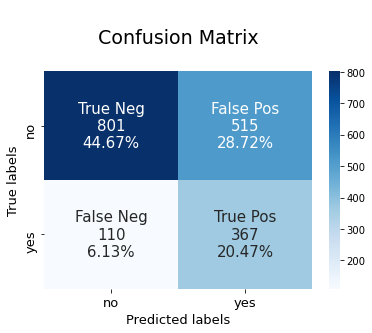

In [16]:
# Plotting the confusion matrix
cf_matrix = confusion_matrix(Y_test, Y_pred_logr)  # create a confusion matrix object

group_names = ['True Neg','False Pos','False Neg','True Pos']   # Create string labels for each quadrant 
group_counts = ['{0:0.0f}'.format(value) for value in cf_matrix.flatten()]    # Output: 1 Array containing the total values for each quadrant
group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]   # Output: 1 array containing the percentage values for each quadrant
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names, group_counts, group_percentages)] # Return the first element of each list, then the second element of each list, etc. This is a trick to consider the three lists as key and data to create a dictionary.
labels = np.asarray(labels).reshape(2,2)      # Convert the dictionary created before to an array. After that, the array is reshaped to 2-Dimension

sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size":15})  # Create a heatmap chart with the specified parameters.

# labels, title and ticks
ax= plt.subplot()                                      # This function allows us to customize the X-axis and Y-axis of the figure
ax.set_title('\nConfusion Matrix\n', fontsize = 19)    # Add a title to the heatmap chart
ax.set_xlabel('Predicted labels', fontsize = 13)       # This X-Axis property allows us to customize the labels of X-axis
ax.set_ylabel('True labels', fontsize = 13)            # This Y-Axis property allows us to customize the labels of Y-axis
ax.xaxis.set_ticklabels(['no', 'yes'], fontsize = 13)  # This X-Axis property allows us to customize the values of X-axis
ax.yaxis.set_ticklabels(['no', 'yes'], fontsize = 13)  # This X-Axis property allows us to customize the values of Y-axis

plt.show()  # Display the current figure that we are working on

# np.flatten        This function is used to return a copy of the array collapsed into one dimension
# zip()             This function is used to merge 2 or more lists together. 
# np.asarray        This function is used to convert a given input to an array.
# .reshape          This function is used to give a new shape to an array without changing its data

In [17]:
# Calculating the feature importance in Random Forest Classifier (Part 1)

rfc.fit(X_train_res, Y_train_res) # Train the Random Forest Classifier object

importances = rfc.feature_importances_              
# Output: Feature importance for all the attributes that we have used in this model. 
indices = np.argsort(importances)[::-1]             
# Return the index of each feature (sorted from highest to lowest)
features = list(x_telecom) # Get the names of the columns of "Telecom Users" dataset excluding column "Churn"

print('feature ranking:\n')
for f in range(x_telecom.shape[1]):      # For-loop iterates over the names found in each column of "Telecom Users" dataset
  print('%d. %s (%f)' %(f + 1, features[indices[f]], importances[indices[f]]))  
# Output: Feature importance for all the attributes that we have used in this model. 
# It starts with the most important feature.

# .feature_importances_       This attribute returns an array of each feature’s importance in determining the splits.
#                             The random forest classifier calculates their splits by mathematically determining 
#                             which split will most effectively help distinguish the classes.
# np.argsort()                This function is used to perform an indirect sort along the given axis using 
#                             the algorithm specified by the kind keyword.
# “[::-1]”                    This is the slicing trick, which will create a copy of the list, but in a reverse order 
#                             (preserving the original list)
# .shape                      This function is used to get the current shape of an array


# The higher the number, the more important the feature (all importance scores sum to 1)

feature ranking:

1. Contract#Month-to-month (0.189099)
2. TechSupport#No (0.146425)
3. OnlineSecurity#No (0.130456)
4. PaymentMethod#Electronic check (0.087837)
5. DeviceProtection#No (0.076224)
6. tenure (0.062287)
7. Contract#Two year (0.055247)
8. InternetService#Fiber optic (0.053387)
9. OnlineBackup#No (0.043869)
10. Contract#One year (0.030580)
11. OnlineSecurity#Yes (0.021838)
12. PaperlessBilling (0.019897)
13. TechSupport#Yes (0.014551)
14. Partner (0.012342)
15. TotalCharges (0.010553)
16. PaymentMethod#Credit card (automatic) (0.009025)
17. OnlineBackup#Yes (0.007893)
18. OnlineSecurity#No internet service (0.005469)
19. Dependents (0.004837)
20. StreamingMovies#No internet service (0.003797)
21. InternetService#No (0.003740)
22. PaymentMethod#Bank transfer (automatic) (0.002715)
23. StreamingTV#No (0.002035)
24. SeniorCitizen (0.001966)
25. MonthlyCharges (0.001146)
26. StreamingMovies#Yes (0.000764)
27. InternetService#DSL (0.000677)
28. PaymentMethod#Mailed check (0.0003

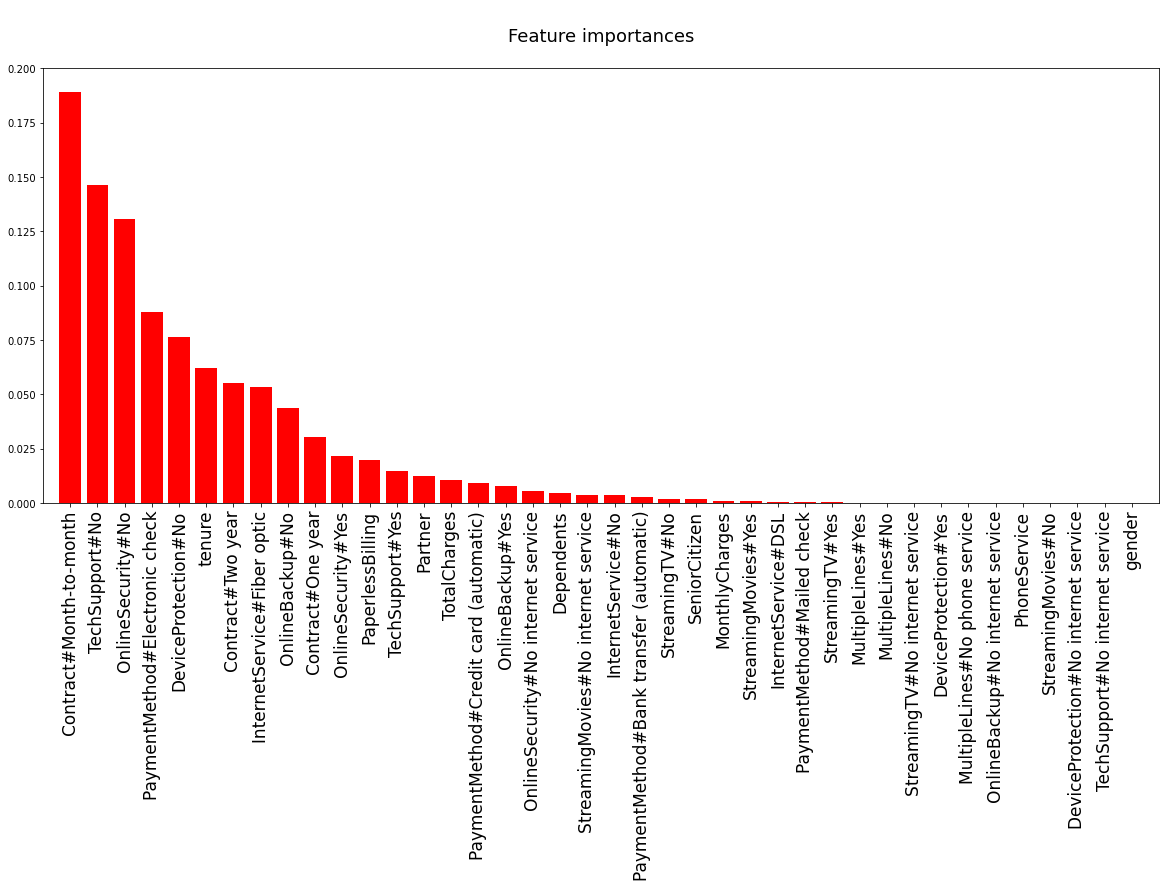

In [18]:
# Calculating the feature importance in Random Forest Classifier (Part 2)

# Plotting the feature importance in random forest classifier
fig = plt.figure()       # create a figure object
plt.title("\nFeature importances\n", fontsize = 18)  # Add a title to the barchart
plt.bar(range(x_telecom.shape[1]), importances[indices], color="r", align="center")  
# Create a barchart with the specified parameters.
plt.xticks(range(x_telecom.shape[1]), np.array(features)[indices], rotation=90, fontsize=17)
# This X-Axis property allows us to customize the values of X-axis

plt.xlim([-1, x_telecom.shape[1]])   
# This X-Axis property allows us to start the bar chart with an space on x-axis (better presentation)

fig.set_size_inches(20,8)             # This parameter is used to adjust the size of the bar chart.
axes = plt.gca()                      # get current axes
axes.set_ylim([0,.200])               # This Y-Axis property indicates: "Start at 0, finish at .200"

plt.show()   # Display the current figure that we are working on


As we can see above, the **top 3 features are**:
1. Contract#Month-to-month (0.189099): Customer having monthly contract
2. TechSupport#No (0.146425): Technical support service is not connected
3. OnlineSecurity#No (0.130456):  Online security service is connected 

In [19]:
# Converting the numeric variable (Churn) into categorical (1:Yes, 0:No)

y_telecom_cat = y_telecom.copy()   # Create a copy of "target variable dataframe" after all preprocessing
# Replacing 1 and 0 values in Churn feature for better understanding in the decision tree graph
y_telecom_cat["Churn"] = y_telecom_cat["Churn"].replace({0:'No', 1:"Yes"}) 

print (y_telecom_cat['Churn'].unique()) 


['No' 'Yes']


In [20]:
# Creating a function to plot the decision tree classifier

#dtc1 = DecisionTreeClassifier() # Create the Decision Tree Classifier object
dtc.fit(X_train_res, Y_train_res) # Train the Random Forest Classifier object
    
def printTree(DTC):
    feature_names = features
    target_names = y_telecom_cat['Churn'].unique() # Get only unique values. In this case: ['Yes' & 'No']
    
    #Build the tree with the specified parameters
    dot_data = tree.export_graphviz(DTC, out_file=None, feature_names=feature_names, class_names=target_names, filled=True, rounded=True)
    
    #Plot the Decision Tree
    DecisionTreeClassifier = graphviz.Source(dot_data)
    
    #pydot_graph = pydotplus.graph_from_dot_data(dot_data)
    #pydot_graph.write_png('dtc.png')

    return DecisionTreeClassifier

print ('''\n1. The Function has been created succesfully''')


1. The Function has been created succesfully


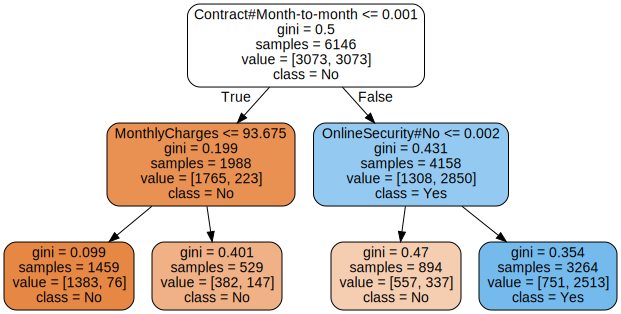

In [21]:
# Plo a function to plot the decision tree classifier
dtc_graph = printTree(dtc) 
dtc_graph 

## References

<a id='section_id'></a>
&emsp;[1] Bruce, A. Bruce, and P. Gedeck,Practical Statistics for Data Scientists:50+ Essential Concepts Using R and Python. O’Reilly Media, 2020 <BR>
&emsp;[2] C. Albon, Machine learning with python cookbook: Practical solutionsfrom preprocessing to deep learning.” O’Reilly Media, Inc.”, 2018.